
# **BiotrAIn 2025 Tutorial: Data integration for microbiome research using scikit-bio**


# Section 02: Beta diversity (40 min)

- Time: 8:55 - 9:30:00 EDT, June 17, 2025
Welcome to the practical session 02. Created by Qiyun Zhu (on behalf of Daniel McDonald) and adapted by Nelly Selem (Secodment host), and Jeanett Daga (Secodment) for CABANA BiotraAIn.




🏆 **QUESTIONS**
1. What is beta diversity?
1. What is diversity?
2. How to identify differences in microbial community composition between samples?

🎯 **AIMS**

1. Differentiate between alpha and beta diversity.

2. Compare the microbial community composition between samples.

3. Visualize data differences by reducing dimension with ordination plots.



🔑 **KEY POINTS**


1. Beta diversity measures the inter-sample diversity.

2. The Bray-Curtis index is a commonly used dissimilarity metric for assessing beta diversity between microbial communities

3. PCoA allows a visual representation of Bray-Curtis distances in a    reduced-dimensional space, typically a 2D or 3D plane.

2. Alpha diversity measures the intra-sample diversity.




## Preparation (4 min)

Install the latest version of scikit-bio if it hasn't been (needed for every Google Colab instance).

In [ ]:
from importlib.util import find_spec

In [ ]:
if find_spec('skbio') is None:
    !pip install -q scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 107.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import skbio
skbio.__version__

'0.6.3'

## β diversity is a distance between samples (7 min)

 **β diversity** measures the differences in microbial community composition between different environments or samples.

**α diversity** measure diversity in one sample. For now lets take as alpha diversity the number of different species in the sample


An example of β-diversity is to compare the distinct species composition of fishes between two lakes.

β diversity = (A-(A⋂B))+(B-(A⋂B))

=(# Species in A - # common species)+(# Species in B - # common species)


The number of species in Lake A is 3. The species that are shared with the Lake B is 2. So the number of unique species in Lake A compared to Lake B is (3-2) = 1. To this number, we will sum the result of the same operations but now take Lake B as our reference site. In the end, the β diversity between Lake A and Lake B is (3-2) + (3-2) = 2. This process can be repeated, taking each pair of lakes as the focused sites.

![imagen](https://carpentries-lab.github.io/metagenomics-analysis/fig/03-08-02.png)   
Figure 2. Alpha and beta diversity indexes of fishes in a pond.





### Exercise 1. Calculate alpha and beta diversity (5 min)
In the next picture, there are two lakes with different fish species:  

<img src="https://carpentries-lab.github.io/metagenomics-analysis/fig/03-08-03.png" width="800" height="400">.

Which of the options below is true for the alpha diversity in lakes A, B, and beta diversity between lakes A and B, respectively?

a) 4, 3, 1

b) 4, 3, 5

c) 9, 7, 16

<details>
  <summary> Click here to see the solution</summary>

Answer: b) 4, 3, 5.  

Alpha diversity in this case, is the sum of different species. Lake A has 4 different species and lake B has 3 different species.

Beta diversity refers to the difference between lake A and lake B. If we use the formula in Figure 2 we can see that to calculate beta diversity, we have to detect the number of species and the number of shared species in both lakes. There is only one shared species, so we have to subtract the number of shared species to the total species and sum the result.

In this case, in lake A, we have 4 different species and one shared species with lake B (4-1)=3, and in lake B we have three species and one shared species with lake A (3-1)=2. If we add 3+2, the result is 5.
  </details>

These examples are from the [Metagenomics Workshop](https://carpentries-lab.github.io/metagenomics-workshop/) from the carpentries Incubator were you can learn all the steps to process a sample, including cleaning and processing shotgun metagenomes by following a real case about 4 Ciénegas.

In microbiome beta diversity helps identify biogeographic patterns, ecological gradients, or the effect of environmental factors (like salinity, depth, host, etc.). Beta diversity can be measured with different metrics like:

  1. The [Jaccard index](https://es.wikipedia.org/wiki/%C3%8Dndice_de_Jaccard) is based on species presence or absence. It calculates the proportion of shared species relative to the total number of unique species across both communities.

  2. [UniFrac distance](https://en.wikipedia.org/wiki/UniFrac), measures the phylogenetic relationship between the species of the community).  

  3. The [Bray-Curtis dissimilarity](https://en.wikipedia.org/wiki/Bray%E2%80%93Curtis_dissimilarity) assesses compositional differences between communities by incorporating species abundance. It is particularly sensitive to the abundance of dominant taxa, making it a robust metric for ecological studies where relative abundance matters. Values range from 0 (indicating identical community composition) to 1 (indicating complete dissimilarity).


## Bray-Curtis dissimilarity considers both abundance and composition (7 min)


We are going to calculate Bray Curtis distance between every pair of samples. Every sample has many dimensions, one for every organism. To visualice samples preserving some caracteristics of the distance between them we will use some reduction techniques.  

Lets first import pandas and skbio libraries

In [ ]:
import pandas as pd
from skbio import Table
from skbio import SampleMetadata
from skbio.diversity import beta_diversity
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Now we are going to set a HOME variable to store the directory were data are located

In [ ]:
# Create a text variable to use after as a path to read files
github_data = "https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/"
HOME = github_data

Here we are reading the metadata from latinamerican samples in a DataFrame.

In [ ]:
# generate the metadata path by joining github_data_path with "emp500/sample.tsv"
latam_metadata_path = HOME + "latam/latam_samples.tsv"
# Read the TSV file directly from the URL into a pandas DataFrame
latam_metadata_df = pd.read_csv(latam_metadata_path, sep='\t', low_memory=False, index_col='sample_name')
latam_metadata_df.head(2)

,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.jensen.43.s012,Jensen43.MX12.189,sediment,07/02/2012,Mexico,15.0,Jensen43.sediment.11,0.0,Jensen,43,Jensen43,...,marine subtidal rocky reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-189,not applicable,21.02361,-86.77158,Jensen sediments from global ocean,marine sediment metagenome
13114.jensen.43.s013,Jensen43.MX12.213,sediment,07/04/2012,Mexico,15.0,Jensen43.sediment.12,0.0,Jensen,43,Jensen43,...,marine reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-213,not applicable,20.33194,-87.02712,Jensen sediments from global ocean,marine sediment metagenome


Here we are reading the BIOM-formatted dataset containing species abundance counts into a DataFrame

In [ ]:
# prompt: generate the biom path by joining github_data_path with "emp500/sample.tsv"
latam_biom_path = HOME + "latam/shotgun/latam_ogu.biom"
latam_biom= Table.read(latam_biom_path) # Corrected variable name
latam_df = latam_biom.to_dataframe()
latam_df = latam_df.T
latam_df.head()

,G000005825,G000006175,G000006605,G000006725,G000006745,G000006785,G000006845,G000006865,G000006925,G000006965,...,G902812375,G902812395,G902825795,G902825845,G902825965,G902826025,G902826465,G902826605,G902827015,G902827055
13114.jensen.43.s012,0,0,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,23.0,0,1.0,0,0
13114.jensen.43.s013,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,0
13114.jensen.43.s014,0,0,0,0,0,0,0,0,1.0,0,...,0,0,0,0,0,0,0,0,2.0,0
13114.pinto.63.s001,0,0,0,0,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.pinto.63.s002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
latam_metadata = SampleMetadata.read(f'{HOME}/latam/latam_samples.tsv')
empo_2 = latam_metadata.get_column('empo_2').to_series()
empo_2

,empo_2
sample_name,
13114.jensen.43.s012,Saline
13114.jensen.43.s013,Saline
13114.jensen.43.s014,Saline
13114.pinto.62.s001,Non-saline
13114.pinto.62.s002,Non-saline
...,...
13114.zaneveld.9.s006,Animal
13114.zaneveld.9.s010,Animal
13114.zaneveld.9.s011,Animal


In [ ]:
latam_metadata = SampleMetadata.read(f'{HOME}/latam/latam_samples.tsv')
empo_1 = latam_metadata.get_column('empo_1').to_series()
empo_1

,empo_1
sample_name,
13114.jensen.43.s012,Free-living
13114.jensen.43.s013,Free-living
13114.jensen.43.s014,Free-living
13114.pinto.62.s001,Free-living
13114.pinto.62.s002,Free-living
...,...
13114.zaneveld.9.s006,Host-associated
13114.zaneveld.9.s010,Host-associated
13114.zaneveld.9.s011,Host-associated


Lets get the Bray curtis metrics from latam_df and make a data frame of the results


In [ ]:
depth = 100
even_table = latam_biom.subsample(depth)
even_table

1400 x 64 <class 'biom.table.Table'> with 2752 nonzero entries (3% dense)

In [ ]:
from skbio.diversity import beta_diversity

# Now, beta_diversity should work as the tip names in the tree match the observation IDs in the table
full_dm = beta_diversity('braycurtis', even_table)


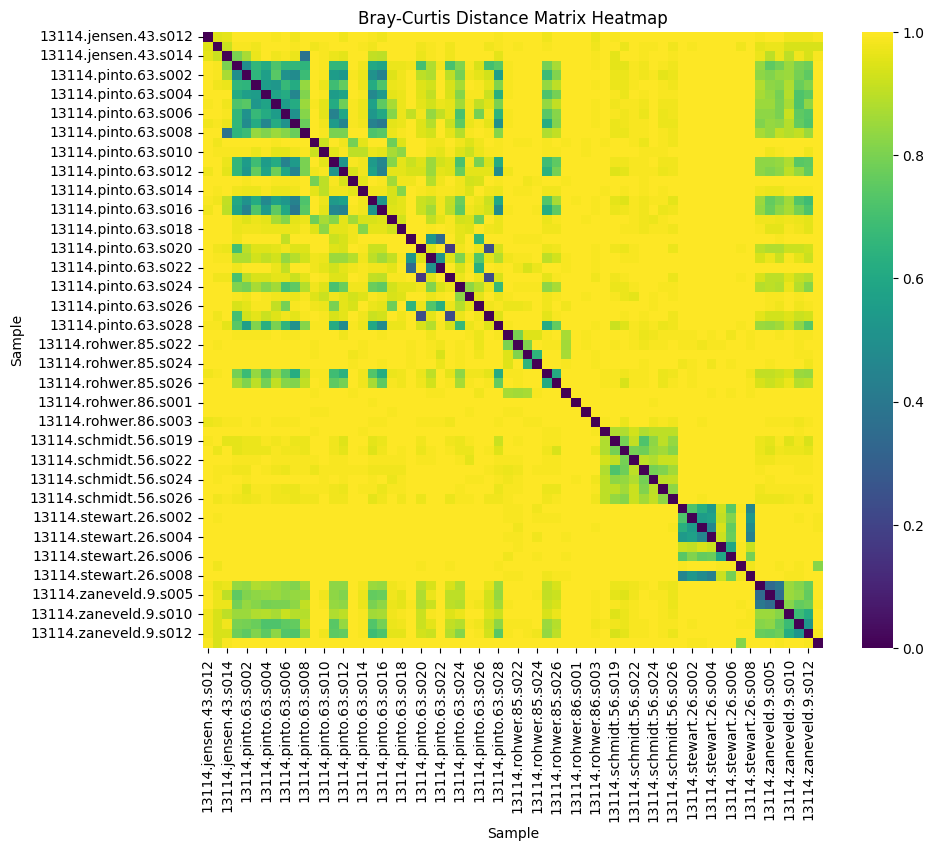

In [ ]:
# prompt: full_dm heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Convert the DistanceMatrix to a DataFrame for seaborn
dm_df = full_dm.to_data_frame()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dm_df, cmap="viridis")
plt.title("Bray-Curtis Distance Matrix Heatmap")
plt.xlabel("Sample")
plt.ylabel("Sample")
plt.show()


Text(0, 0.5, 'Frequency')

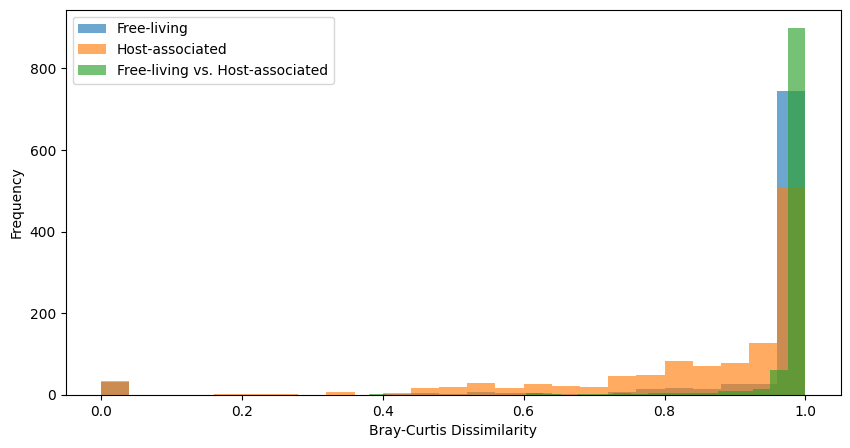

In [ ]:
plt.figure(figsize=(10, 5))

empo_1 = empo_1.loc[list(full_dm.ids)]

labels = []
for env in empo_1.unique():
    env_ids = set(empo_1[empo_1 == env].index)
    within_data = full_dm.within(env_ids)
    plt.hist(within_data['value'], alpha=0.65, bins=25)
    labels.append(env)

from_label, to_label = empo_1.unique()
from_ = empo_1[empo_1 == from_label].index
to_ = empo_1[empo_1 == to_label].index

between_data = full_dm.between(from_, to_)
plt.hist(between_data['value'], alpha=0.65, bins=25)
labels.append(f'{from_label} vs. {to_label}')

plt.legend(labels);

plt.xlabel('Bray-Curtis Dissimilarity')
plt.ylabel('Frequency')

## PCoA allows visualization by reducing data dimention while preserving distances(7 min)

Let's now move on to [Principal Coordinates Analysis](https://en.wikipedia.org/wiki/Multidimensional_scaling#Classical_multidimensional_scaling) (PCoA). PCoA is a dimensionality reduction technique, which allows us to examine the primary axes of variation in a dataset. The scikit-bio implementation is based on [Legendre & Legendre](https://shop.elsevier.com/books/numerical-ecology/legendre/978-0-444-89249-2), but scikit-bio also supports an approximate version of PCoA, where the number of dimensions calculated is parameterized, and is scalable to quite large datasets.

As we'll see, the `OrdinationResults` object has a few member methods, including a `DataFrame` representation of the coordinate data.

Let's calculate principal coordinates to see data in a space of lower dimension

In [ ]:
from skbio.stats.ordination import pcoa
pc = pcoa(full_dm, number_of_dimensions=10)
pc.proportion_explained


,0
PC1,0.127906
PC2,0.066066
PC3,0.056834
PC4,0.051369
PC5,0.040656
PC6,0.038417
PC7,0.034612
PC8,0.032220
PC9,0.027226
PC10,0.026601


Let's see the coordinates of each sample in the principal components

In [ ]:
pc.samples.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
13114.jensen.43.s012,-0.137712,0.055546,0.020782,-0.026691,0.068684,-0.062047,0.054423,-0.065047,-0.047910,-0.191330
13114.jensen.43.s013,-0.138488,0.071866,0.079835,-0.003371,0.128763,-0.014397,0.041310,-0.088226,-0.026881,-0.255156
13114.jensen.43.s014,-0.029599,0.038063,0.117591,-0.005556,0.104786,-0.005681,0.222712,-0.603379,0.030400,0.083128
13114.pinto.63.s001,0.355776,-0.018483,0.165628,0.174703,-0.134036,-0.018767,0.059784,-0.152072,0.072977,0.081579
13114.pinto.63.s002,0.434365,-0.080809,-0.011739,-0.041561,-0.094327,-0.050519,0.065057,-0.102223,0.002717,0.042774


Now we will visualize the samples in the coordinates of the first two coordinates

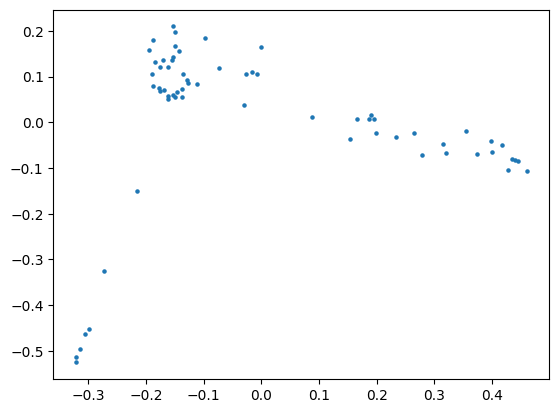

In [ ]:
plt.scatter(pc.samples['PC1'], pc.samples['PC2'], s=5);

We wish to distinguish diferent metadata in this visualization. The < pcoa_plot > function allows us to add metadata information.  

...but that's not that interesting. Let's add some color. We're going to do this a couple of times so let's write a small function.

**NOTE**: We also recommend [EMPeror](https://academic.oup.com/gigascience/article/2/1/2047-217X-2-16/2656132) for large scale visualization. It is compatible with the `OrdinationResults` object, supports interactive operation and various brushing options.  

In [ ]:
def pcoa_plot(ord_result, sample_metadata, category, title=None):
    plt.figure(figsize=(7, 7))
    if len(ord_result.samples) > 300:
        s = 5
    else:
        s = 10

    labels = []
    ord_ids = set(ord_result.samples.index)
    category_series = sample_metadata.get_column(category).to_series()
    for env in category_series.unique():
        labels.append(env)

        env_ids = sample_metadata.get_ids(where=f"[{category}] = '{env}'")
        env_ids = list(env_ids & ord_ids)
        plt.scatter(ord_result.samples.loc[env_ids, 'PC1'],
                    ord_result.samples.loc[env_ids, 'PC2'],
                    s=s, alpha=0.75)
        ax = plt.gca()
        ax.set_xlabel(f'PC1 ({100 * (ord_result.proportion_explained[0]):.2f}%)')
        ax.set_ylabel(f'PC2 ({100 * (ord_result.proportion_explained[1]):.2f}%)')
        plt.legend(labels)
        if title is not None:
            plt.title(title)


We can call the pcoa_plot function with empo_1 information

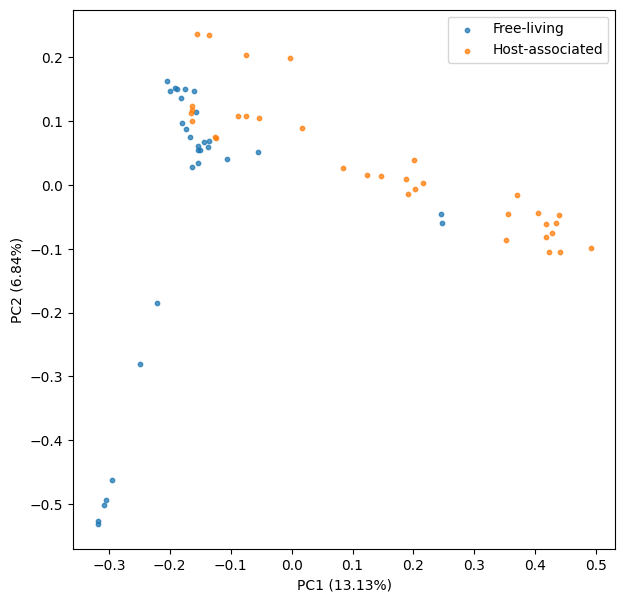

In [ ]:
pcoa_plot(pc, latam_metadata, 'empo_1')

We can call the pcoa_plot function with empo_2 information

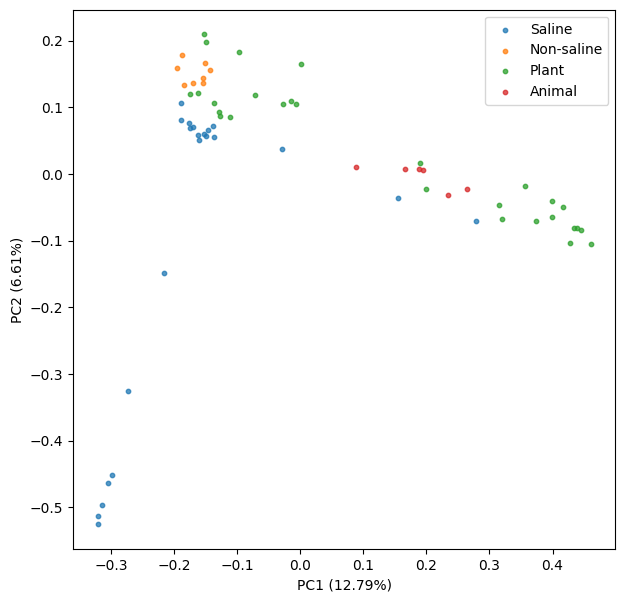

In [ ]:
pcoa_plot(pc, latam_metadata, 'empo_2')

To support the above analyses, we will apply [PERMANOVA](https://onlinelibrary.wiley.com/doi/10.1111/j.1442-9993.2001.01070.pp.x) to the distances. PERMANOVA is a non-parametric analysis of variance. By default, PERMANOVA computes 999 permutations which is used to estimate the p-value.

In [ ]:
from skbio.stats.distance import permanova

In [ ]:
permanova(full_dm, empo_1)
#pseudo F is the same thanin Anova, If F is larger than 1, then the groups are different

,PERMANOVA results
method name,PERMANOVA
test statistic name,pseudo-F
sample size,64
number of groups,2
test statistic,5.072123
p-value,0.001
number of permutations,999


The data shows a statistically significant difference between the two groups (p = 0.001), supported by a strong pseudo-F value 5.016. This suggests that the groups are meaningfully different in terms of their multivariate composition.

In [ ]:
permanova(full_dm, empo_2)
#pseudo F is the same thanin Anova, If F is larger than 1, then the groups are different

,PERMANOVA results
method name,PERMANOVA
test statistic name,pseudo-F
sample size,64
number of groups,4
test statistic,3.830095
p-value,0.001
number of permutations,999


This result indicate, at least one of the four groups is significantly different from the others in terms of multivariate structure.

## α Diversity is not a distance (5 min)

α diversity measures diversity within one metagenome. Besides richness (, i.e., the number of different species in an environment), we can also consider the abundance of the species in the environment as well (i.e., the number of individuals of each species inside the environment). To measure α-diversity, we use indexes such as Shannon’s, Simpson’s, Chao1, etc.

![fishes in 3 lakes](https://carpentries-lab.github.io/metagenomics-analysis/fig/03-08-01.png)
Figure 1. Alpha diversity is calculated according to fish diversity in a pond. Here, alpha diversity is represented in its simplest way: Richness.

To learn more about alpha diversity we will explore an application from the [Museo virtual de matemáticas](https://mumat.matcuer.unam.mx/)
<img src="https://mumat.matcuer.unam.mx/img/circulo.png" width="50" height="50">. Add or remove elements of the population to find a maximum for the alpha diversity (5 min)

### Shannon Diversity

In [ ]:
shannon_dm = beta_diversity('shannon', even_table)
shannon_dm

NameError: name 'beta_diversity' is not defined

In [ ]:
from IPython.display import IFrame
IFrame(src="https://mumat.matcuer.unam.mx/apps/biomat/diversidad/#/intro)", width='100%', height=800)

# Self evaluation poll (10 min)

To consolidate your learning from the session “Beta Diversity”, please complete the following quiz. It includes multiple-choice questions covering key concepts such as Beta diversity.

📌 Click the link below to begin the quiz:
👉 [Link to poll, Quiz 2](https://https://pollev.com/biotrainaicabana135)

1. Select “Skip for now” when prompted to log in.

2. Enter your name to join as a participant.

3. Select all correct answers — some questions may have multiple correct options.

4. You can review your results at the end of the quiz.
This short assessment will help reinforce your understanding and prepare you for further analysis and integration tasks in microbiome research.


# Evaluation of first morning sesion (5 min)

Please complete the session evaluation by filling out the following form: [Evaluation of first sesion](https://docs.google.com/forms/d/e/1FAIpQLSdDrsKl0elbDIm3-x7HMtgKEbmdViBaWECBKbM5Z2HOu9t0JQ/viewform?usp=header)